In [183]:
%matplotlib inline
import numpy as np

from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import warnings
from itertools import cycle, islice

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

## Example Applying PCA to non-linearly seperable data 


In [184]:
X, y = make_circles(n_samples=200, random_state=20, factor=0.3,noise=0.05)
df =pd.DataFrame(X)
df.columns=['a','b']
df["y"]=y

<AxesSubplot:xlabel='a', ylabel='b'>

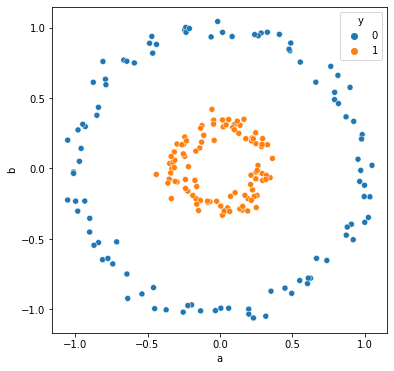

In [185]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='a',y='b', hue="y")

Let us apply regular PCA to this non-learn data and see how the PCs look like. We use sklearn’s PCA function to do the PCA.

In [186]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [187]:
pc_res = pd.DataFrame(X_pca)
pc_res.columns=["pc1","pc2"]
pc_res.head()
pc_res['y']=y

The PCA plot shows that it looks very much like the original data and there is no line that can separate data from two groups.

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

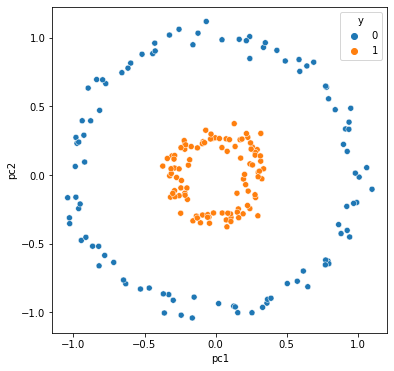

In [188]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=pc_res,x='pc1',y='pc2',hue="y")

## Now Kernel PCA
we want to see a line that linearly separates. Now, let us use the same data, but this time apply kernal PCA using kernalPCA() function in sklearn. The basic idea behind kernal PCA is that we use kernal function to project the non-linear data into higher dimensional space where the groups are linearly separable. And then use regular PCA to do the dimentionality reduction.

Here use KernelPCA() function with “rbf” kernel function to perform kernel PCA.
$$K(x,x')=\exp\left(-\gamma\|x-x'\|^2\right)$$

In [189]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True,gamma=2,n_components=2)
X_kpca = kpca.fit_transform(X)

kpca_res = pd.DataFrame(X_kpca)
kpca_res.columns=["kpc1","kpc2"]
kpca_res['y']=y
kpca_res.head()

,kpc1,kpc2,y
0,0.365758,0.444334,1
1,-0.405081,0.013963,0
2,-0.319236,-0.509263,0
3,0.414538,-0.003529,1
4,0.381108,-0.386623,1


<AxesSubplot:xlabel='kpc1', ylabel='kpc2'>

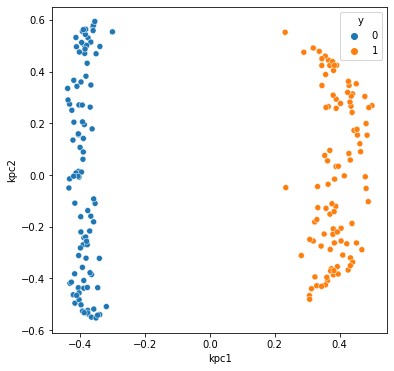

In [190]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=kpca_res,x='kpc1',y='kpc2',hue="y")

# Example of spectral Clustering
IN this example we will create a graph and do spectral clustering. You can play around with the graph structure and other hyper parameters. 

In [194]:
## remove warnings related to future and k-nn
warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
warnings.filterwarnings(
    "ignore",
    message="Graph is not fully connected, spectral embedding"
    + " may not work as expected.",
    category=UserWarning,
)
warnings.simplefilter(action='ignore', category=FutureWarning)

### Generate data

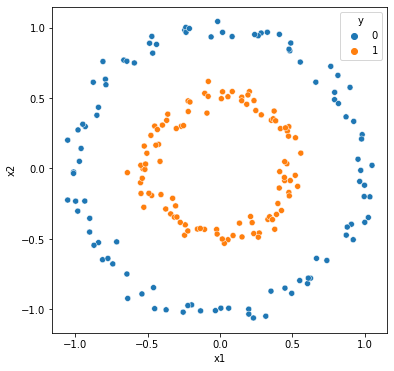

In [195]:
X, y = make_circles(n_samples=200, random_state=20, factor=0.5,noise=0.05)
df =pd.DataFrame(X)
df.columns=['x1','x2']
df["y"]=y
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='x1',y='x2', hue="y")
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

### Below we do spectral clustering on the PCA transformed coordinates

In [164]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

Text(0.5, 0, 'P1')

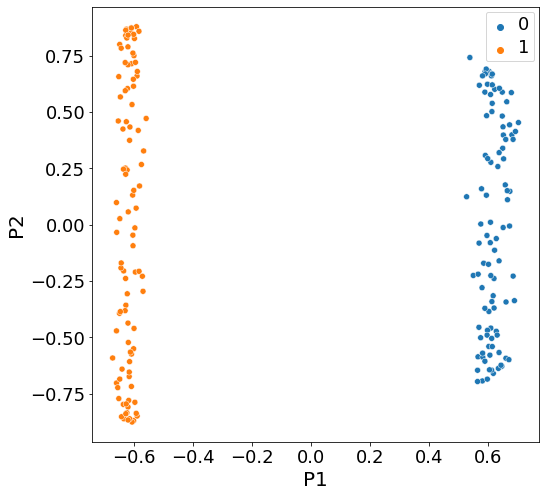

In [180]:
# Visualizing the clustering 
plt.figure(figsize=(8,8))
ax=sns.scatterplot(X_principal['P1'], X_principal['P2'], 
                c = SpectralClustering(n_clusters = 2, affinity ='rbf').fit_predict(X_principal), 
                hue=labels_rbf) 
plt.setp(ax.get_legend().get_texts(), fontsize='18') 

plt.tick_params(labelsize=18)
plt.ylabel("P2", fontsize=20)
plt.xlabel("P1", fontsize=20)

In [174]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

Text(0.5, 0, 'P1')

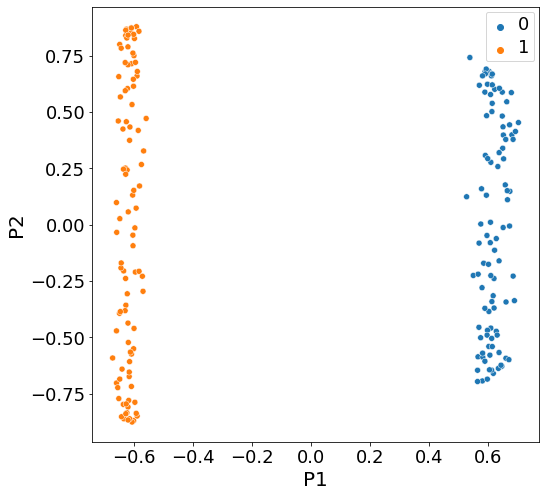

In [181]:
# Visualizing the clustering 
plt.figure(figsize=(8,8))
ax=sns.scatterplot(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors').fit_predict(X_principal),
                hue=labels_nn) #, cmap =plt.cm.winter) 
plt.setp(ax.get_legend().get_texts(), fontsize='18') 

plt.tick_params(labelsize=18)
plt.ylabel("P2", fontsize=20)
plt.xlabel("P1", fontsize=20)

### Now let's do spectral clustering on the original data
Here we expect the predicted labels to look like the original data when visualized.

<AxesSubplot:xlabel='x1', ylabel='x2'>

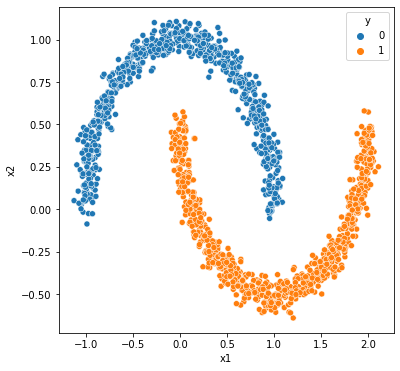

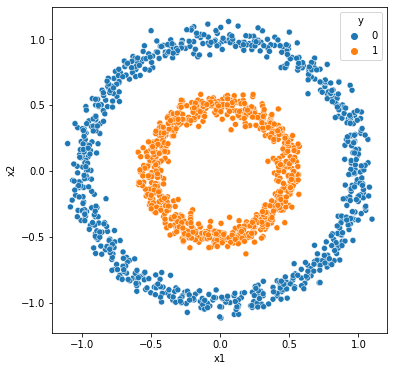

In [196]:

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X,y=noisy_moons
df =pd.DataFrame(X)
df.columns=['x1','x2']
df["y"]=y
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='x1',y='x2', hue="y")
X,y=noisy_circles
df =pd.DataFrame(X)
df.columns=['x1','x2']
df["y"]=y
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='x1',y='x2', hue="y")


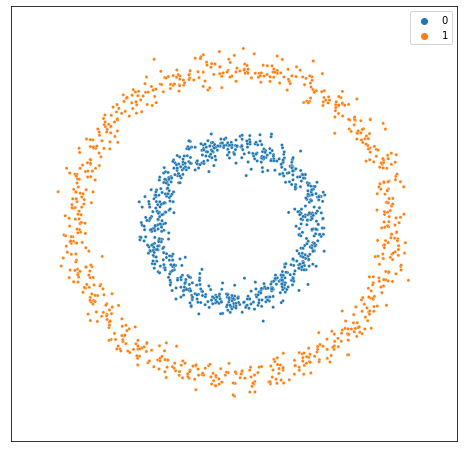

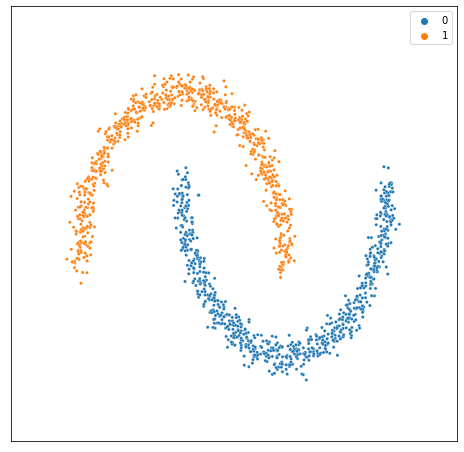

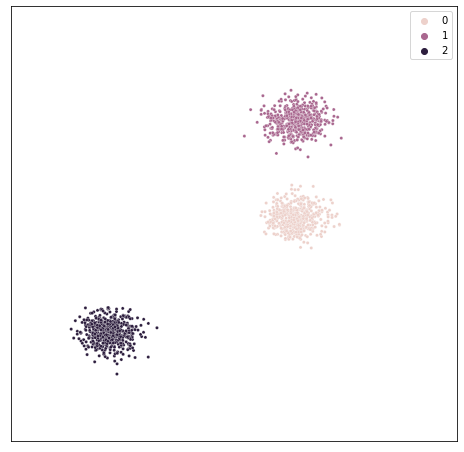

In [204]:



datasets_ = [(noisy_circles,
        { "n_clusters": 2
        },
    ),
    (noisy_moons, { "n_clusters": 2}),
    (blobs, {"n_clusters": 3})]

clustering_algorithms = (
    ("Spectral\nClustering", spectral),
)
idx=1

for i_dataset, (dataset, algo_params) in enumerate(datasets_):
    # update parameters with dataset-specific values

    params.update(algo_params)


    X, y = dataset
    df =pd.DataFrame(X)
    df.columns=['a','b']
    df["y"]=y
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        affinity="nearest_neighbors",
    )
    

    algorithm=spectral
    algorithm.fit_predict(X)

    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int).copy()
    else:
        y_pred = algorithm.fit_predict(X).copy()

    plt.figure(figsize=(8,8)) #subplot(1, len(clustering_algorithms),idx)
    idx+=1

    sns.scatterplot(X[:, 0], X[:, 1], s=10, hue=y_pred)

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())